In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [2]:
np.random.seed(42)
x,y = make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=42)

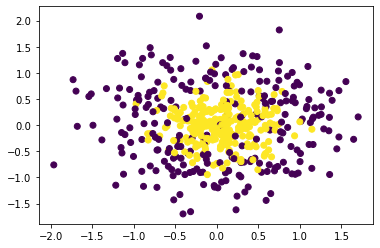

In [3]:
plt.scatter(x[:,0],x[:,1],c=y)

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()
np.mean(cross_val_score(abc,x,y,scoring='accuracy',cv=10))

0.786

In [6]:
abc.fit(x,y)

AdaBoostClassifier()

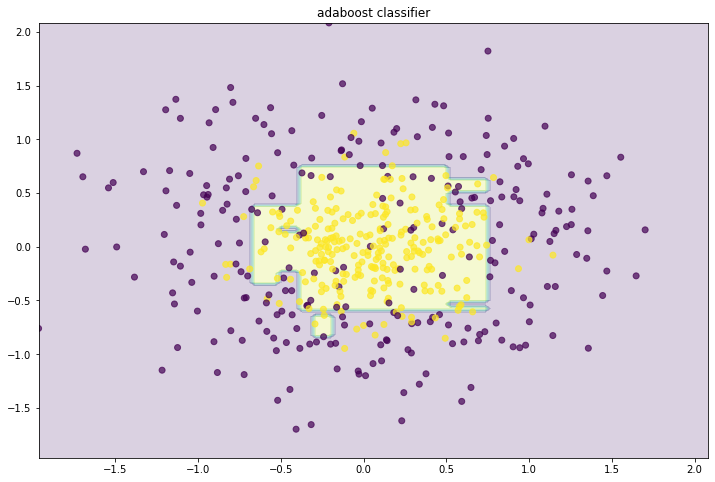

In [9]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12,8))
    x_range = np.linspace(x.min(),x.max(),100)
    xx1,xx2 = np.meshgrid(x_range,x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(),xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1,xx2,y_hat,alpha=0.2)
    plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis',alpha=0.7)
    plt.title('adaboost classifier')
    plt.show()
    
plot_decision_boundary(abc)

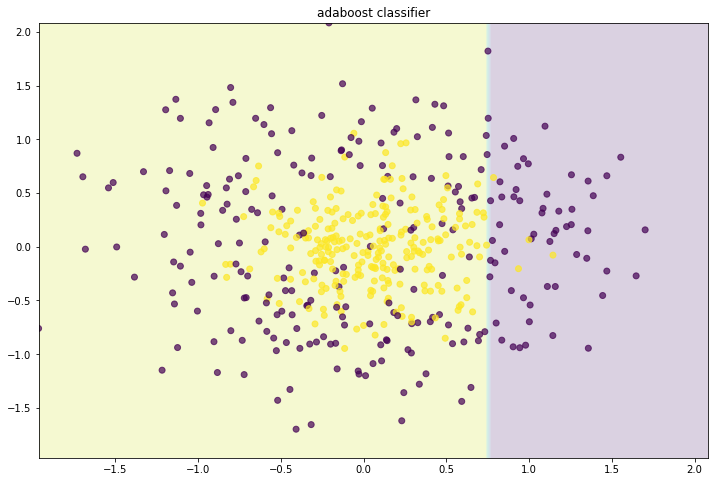

In [12]:
abc = AdaBoostClassifier(n_estimators=1,learning_rate=1)
abc.fit(x,y)
plot_decision_boundary(abc)

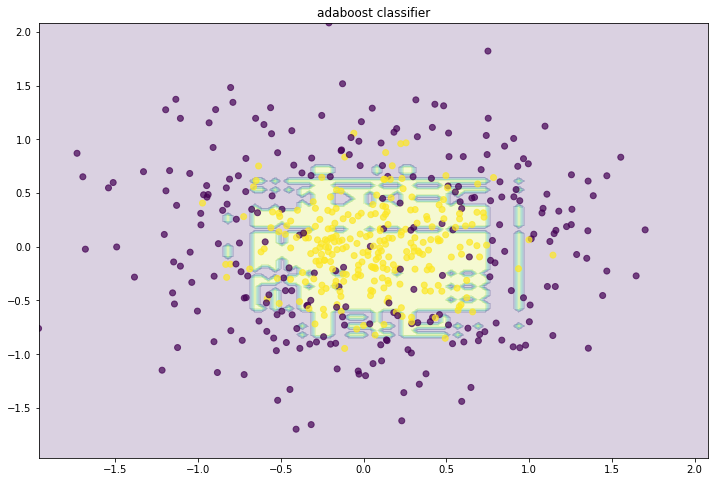

In [14]:
abc = AdaBoostClassifier(n_estimators=1500,learning_rate=1)
abc.fit(x,y)
plot_decision_boundary(abc)

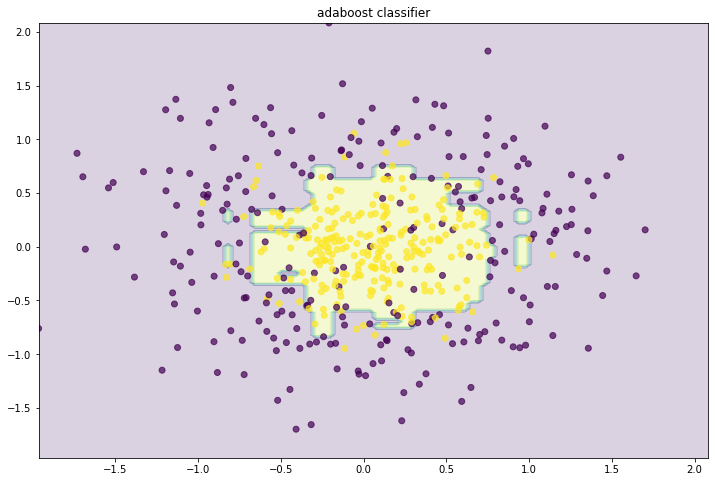

In [13]:
abc = AdaBoostClassifier(n_estimators=1500,learning_rate=0.1)
abc.fit(x,y)
plot_decision_boundary(abc)

# GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV

grid=dict()
grid['n_estimators']=[10,50,100,500]
grid['learning_rate'] = [0.0001,0.001,0.01,0.1,1.0]
grid['algorithm'] = ['SAMME','SAMME.R']

grid_search = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=grid,n_jobs=-1,cv=10,scoring='accuracy')
grid_result = grid_search.fit(x,y)
print(grid_result.best_score_,grid_result.best_params_)

0.8320000000000001 {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}
